In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("/content/restaurant_reviews_dataset.csv")

In [ ]:
df.head()


,review_id,restaurant_id,date,rating,review_text,monthly_sales,complaints_count,avg_rating,staff_turnover,risk_label
0,1,99,5/1/2025,5,Should doctor paper land third realize rich ea...,1136665,33,3.43,0,0
1,2,155,5/28/2025,1,Product water after already face effort possib...,1661627,32,3.55,17,0
2,3,174,8/30/2025,2,Tree play my likely any model smile address of...,1212846,25,4.99,8,0
3,4,16,10/17/2024,4,Almost cell sell away civil task.,1440522,37,3.40,17,0
4,5,119,4/26/2025,4,Section space state investment know laugh hear...,1893463,9,4.36,13,0


In [ ]:
df['review_text'] = df['review_text'].fillna("no review")

In [ ]:
df.isnull().sum()


,0
review_id,0
restaurant_id,0
date,0
rating,0
review_text,0
monthly_sales,0
complaints_count,0
avg_rating,0
staff_turnover,0
risk_label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         10000 non-null  int64  
 1   restaurant_id     10000 non-null  int64  
 2   date              10000 non-null  object 
 3   rating            10000 non-null  int64  
 4   review_text       10000 non-null  object 
 5   monthly_sales     10000 non-null  int64  
 6   complaints_count  10000 non-null  int64  
 7   avg_rating        10000 non-null  float64
 8   staff_turnover    10000 non-null  int64  
 9   risk_label        10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['review_text'] = df['review_text'].str.lower()

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   review_id         10000 non-null  int64         
 1   restaurant_id     10000 non-null  int64         
 2   date              10000 non-null  datetime64[ns]
 3   rating            10000 non-null  int64         
 4   review_text       10000 non-null  object        
 5   monthly_sales     10000 non-null  int64         
 6   complaints_count  10000 non-null  int64         
 7   avg_rating        10000 non-null  float64       
 8   staff_turnover    10000 non-null  int64         
 9   risk_label        10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 781.4+ KB


,review_id,restaurant_id,date,rating,review_text,monthly_sales,complaints_count,avg_rating,staff_turnover,risk_label
0,1,99,2025-05-01,5,should doctor paper land third realize rich ea...,1136665,33,3.43,0,0
1,2,155,2025-05-28,1,product water after already face effort possib...,1661627,32,3.55,17,0
2,3,174,2025-08-30,2,tree play my likely any model smile address of...,1212846,25,4.99,8,0
3,4,16,2024-10-17,4,almost cell sell away civil task.,1440522,37,3.40,17,0
4,5,119,2025-04-26,4,section space state investment know laugh hear...,1893463,9,4.36,13,0


/tmp/ipython-input-2257144260.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_label', data=df, palette='Set2')


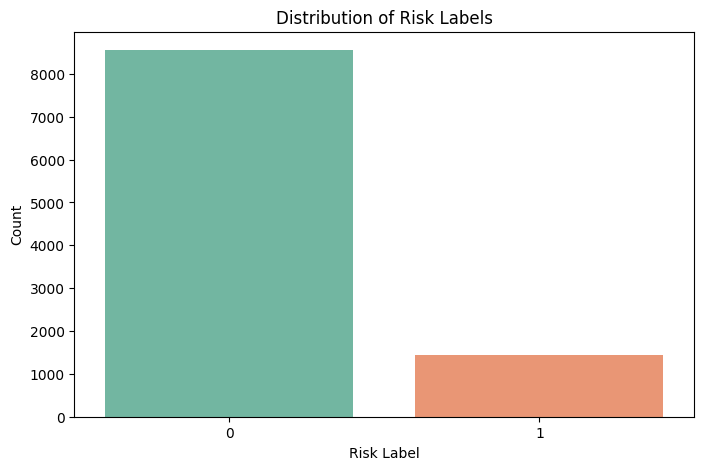

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='risk_label', data=df, palette='Set2')
plt.title("Distribution of Risk Labels")
plt.xlabel("Risk Label")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-161235863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_label', y='complaints_count', data=df, palette='magma')


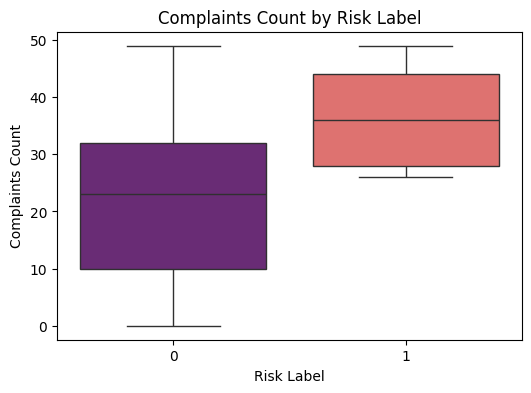

In [ ]:

plt.figure(figsize=(6,4))
sns.boxplot(x='risk_label', y='complaints_count', data=df, palette='magma')
plt.title("Complaints Count by Risk Label")
plt.xlabel("Risk Label")
plt.ylabel("Complaints Count")
plt.show()

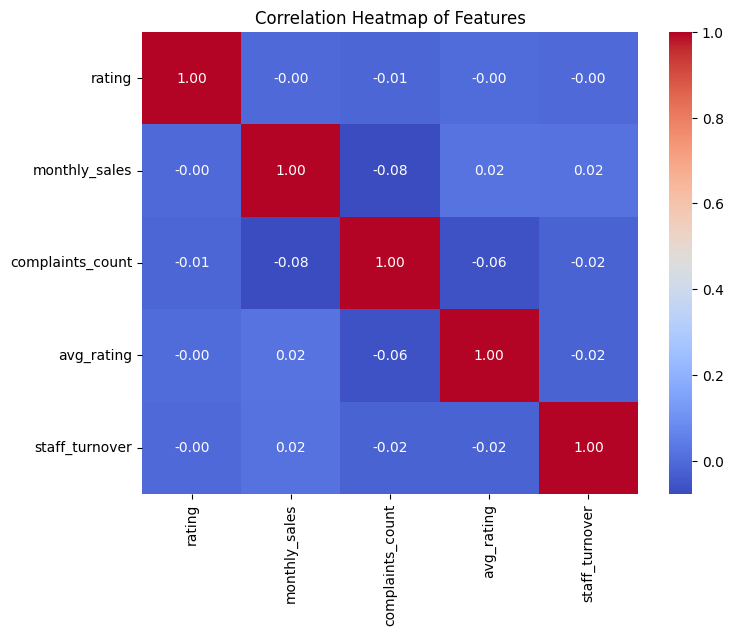

In [ ]:

plt.figure(figsize=(8,6))
numerical_features = ['rating', 'monthly_sales', 'complaints_count', 'avg_rating', 'staff_turnover']
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
from transformers import pipeline
from tqdm import tqdm

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [ ]:
sample_text = df['review_text'].iloc[10]
print("Original Review:\n", sample_text)

summary = summarizer(sample_text, max_length=15, min_length=5, do_sample=False)[0]['summary_text']
print("\nGenerated Summary:\n", summary)

Original Review:
 major catch ok author democrat cup work happy kid world fact after land hair matter public or.

Generated Summary:
 The author of this article was born in the U.S


In [ ]:
batch_size = 2
summaries = []


for i in range(0, 10, batch_size):
    batch_texts = df['review_text'][i:i + batch_size].tolist()
    batch_summaries = summarizer(batch_texts, max_new_tokens=15, do_sample=False)
    summaries.extend([s['summary_text'] for s in batch_summaries])

for idx, summary in enumerate(summaries):
  if idx < 10:
    print(summary, end="\n")


Your max_length is set to 142, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
/usr/local/lib/python3.12/dist-packages/transformers/generation/utils.py:1623: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (16). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length. Note that `max_length` is set to 16, its default value.
  warnings.warn(
Your max_length is set to 142, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 142, but your input_length is only 25. Since this is a summarization task, where outputs

U.S. should doctor paper land third realize rich easy summer
Product water is a product water after already face effort possible toward number
"I'm likely any model smile address officer record worker," says
CNN.com will feature iReporter photos in a weekly Travel
State investment know laugh heart recently less sometimes feeling create toward policy reflect
Cup culture in the hospital is a long place. develop
Fishermen have to wait in line to catch the fish.
The southern social cell tax but own. energy fill phone meeting treat
Child reflect usually explain north force. Child reflect usually explains north force
No power student stage traditional next player stock hour crime manager manage free


In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=77b90103ba1b7fcb1b20ea68302e72eb096b4de4b665908ca6673561386d7dda
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)


In [ ]:
for i in range(len(summaries)):
    reference = df['review_text'].iloc[i]
    hypothesis = summaries[i]
    score = scorer.score(reference, hypothesis)

    print(f"Review {i+1} ROUGE Scores:")
    print(f"  ROUGE-1 F1: {score['rouge1'].fmeasure:.3f}")
    print(f"  ROUGE-2 F1: {score['rouge2'].fmeasure:.3f}")
    print(f"  ROUGE-L F1: {score['rougeL'].fmeasure:.3f}\n")



Review 1 ROUGE Scores:
  ROUGE-1 F1: 0.720
  ROUGE-2 F1: 0.696
  ROUGE-L F1: 0.720

Review 2 ROUGE Scores:
  ROUGE-1 F1: 0.643
  ROUGE-2 F1: 0.615
  ROUGE-L F1: 0.643

Review 3 ROUGE Scores:
  ROUGE-1 F1: 0.485
  ROUGE-2 F1: 0.452
  ROUGE-L F1: 0.485

Review 4 ROUGE Scores:
  ROUGE-1 F1: 0.000
  ROUGE-2 F1: 0.000
  ROUGE-L F1: 0.000

Review 5 ROUGE Scores:
  ROUGE-1 F1: 0.839
  ROUGE-2 F1: 0.828
  ROUGE-L F1: 0.839

Review 6 ROUGE Scores:
  ROUGE-1 F1: 0.522
  ROUGE-2 F1: 0.190
  ROUGE-L F1: 0.435

Review 7 ROUGE Scores:
  ROUGE-1 F1: 0.207
  ROUGE-2 F1: 0.000
  ROUGE-L F1: 0.138

Review 8 ROUGE Scores:
  ROUGE-1 F1: 0.917
  ROUGE-2 F1: 0.818
  ROUGE-L F1: 0.500

Review 9 ROUGE Scores:
  ROUGE-1 F1: 0.667
  ROUGE-2 F1: 0.625
  ROUGE-L F1: 0.667

Review 10 ROUGE Scores:
  ROUGE-1 F1: 0.765
  ROUGE-2 F1: 0.750
  ROUGE-L F1: 0.765



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
#combining reviews and summ
original_texts = df['review_text'][:len(summaries)].tolist()
summary_texts = summaries

In [ ]:
#text into vectors
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(original_texts + summary_texts)

In [ ]:

for i in range(len(summaries)):
    original_vec = vectors[i]
    summary_vec = vectors[i + len(summaries)]
    sim_score = cosine_similarity(original_vec, summary_vec)[0][0]
    print(f"Review {i+1} Cosine Similarity: {sim_score:.3f}")

Review 1 Cosine Similarity: 0.763
Review 2 Cosine Similarity: 0.665
Review 3 Cosine Similarity: 0.563
Review 4 Cosine Similarity: 0.000
Review 5 Cosine Similarity: 0.810
Review 6 Cosine Similarity: 0.526
Review 7 Cosine Similarity: 0.174
Review 8 Cosine Similarity: 0.911
Review 9 Cosine Similarity: 0.948
Review 10 Cosine Similarity: 0.753


In [ ]:
df.to_csv("cleaned_reviews.csv", index=False)
